# Lab08 - Bài tập

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

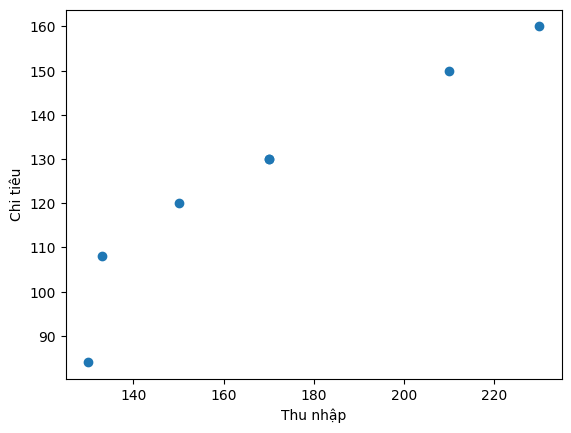

0.9470524056307565

In [17]:
#a
x = np.array([130,150,133,170,170,210,230])
y = np.array([84,120,108,130,130,150,160])

plt.plot(x,y,'o')
plt.xlabel('Thu nhập')
plt.ylabel('Chi tiêu')
plt.show()

correlation = np.corrcoef(x,y)
correlation[0, 1]


Ta thấy hệ số tương quan là: 0.9470524056307565 cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x,y.

Mô hình hồi quy: y = 17.2706 + 0.638x
130 100.20752326007937
230 164.00516890652614


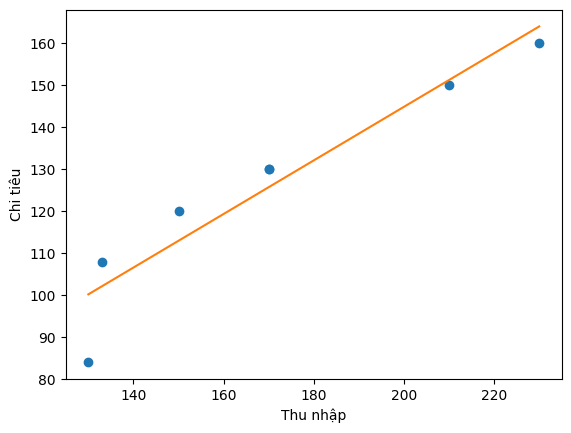

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     43.50
Date:                Thu, 11 Apr 2024   Prob (F-statistic):            0.00120
Time:                        14:13:13   Log-Likelihood:                -24.099
No. Observations:                   7   AIC:                             52.20
Df Residuals:                       5   BIC:                             52.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2706     16.829      1.026      0.3

c:\Users\TranNgocPhat\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\TranNgocPhat\AppData\Local\Temp\ipykernel_5240\2142625318.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")


In [18]:
tu = sum((x - np.mean(x))*(y - np.mean(y)))
mau = sum((x - np.mean(x))**2)
b1 = tu/mau
b0 = np.mean(y) - b1*np.mean(x)
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")
x0 = x.min()
y0 = b0 + b1*x0
x1 = x.max()
y1 = b0 + b1*x1
print(x0, y0)
print(x1, y1)
plt.plot(x, y, 'o')
plt.plot([x0, x1], [y0, y1])
plt.xlabel('Thu nhập')
plt.ylabel('Chi tiêu')
plt.show()

model = sm.formula.ols('y~x', data=pd.DataFrame({'x': x, 'y':y})).fit()
print(model.summary())

print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")


In [19]:
#b
income = 200
expenditure = b0 + b1 * income
expenditure

144.86587521259213

### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng)

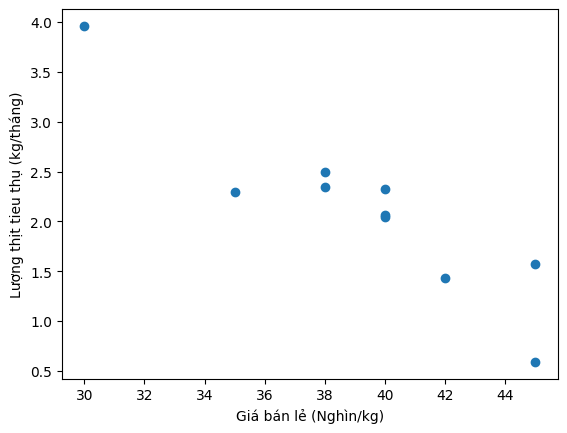

-0.9195328739188577

In [20]:
#a
x = np.array([35,40,45,40,38,40,45,30,42,38])
y = np.array([2.29,2.04,0.59,2.06,2.5,2.32,1.57,3.96,1.43,2.34])  # Added a corresponding element in y

plt.plot(x, y, 'o')
plt.xlabel('Giá bán lẻ (Nghìn/kg)')
plt.ylabel('Lượng thịt tieu thụ (kg/tháng)')
plt.show()
correlation = np.corrcoef(x, y)
correlation[0, 1]

Ta thấy hệ số tương quan là: -0.9195328739188577 cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x,y.

Mô hình hồi quy: y = 9.0808 + -0.1774x
30 3.759588138385503
45 1.0989621087314667


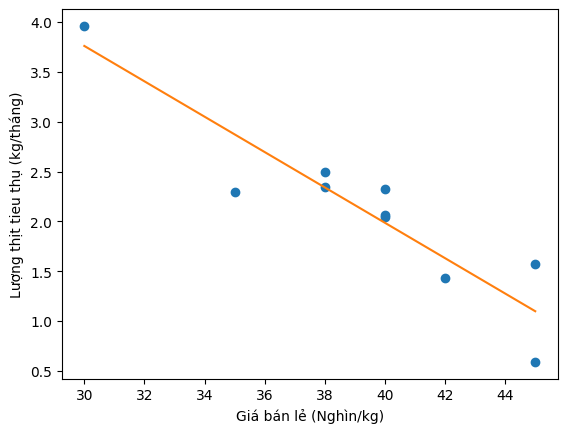

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     43.79
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           0.000166
Time:                        14:13:13   Log-Likelihood:                -2.9041
No. Observations:                  10   AIC:                             9.808
Df Residuals:                       8   BIC:                             10.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0808      1.060      8.570      0.0

c:\Users\TranNgocPhat\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)
C:\Users\TranNgocPhat\AppData\Local\Temp\ipykernel_5240\1678551737.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")


In [21]:
tu = sum((x - x.mean()) * (y - y.mean()))
mau = sum((x - x.mean())**2)
b1 = tu/mau
b0 = y.mean() - b1 * x.mean()
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")
x0 = x.min()
y0 = b0 + b1*x0

x1 = x.max()
y1 = b0 + b1*x1
print(x0, y0)
print(x1, y1)
plt.plot(x, y, 'o')
plt.plot([x0, x1], [y0, y1])
plt.xlabel('Giá bán lẻ (Nghìn/kg)')
plt.ylabel('Lượng thịt tieu thụ (kg/tháng)')
plt.show()

model = sm.formula.ols('y~x', data=pd.DataFrame({'x': x, 'y':y})).fit()
print(model.summary())

print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")

In [22]:
#b
predicted_consumption = b0 + b1 * 41
predicted_consumption

1.8084623833058764

## Bài 3

Dụa trên file dữ liệu `Advertising.csv` bạn hãy dự đoán doanh số bán hàng (`sales`) dựa trên số tiền chi cho các nền tảng tiếp thị khác nhau như `TV`, `Radio` và `Newspaper`

a. Đọc file dữ liệu cho biết các thông tin cơ bản về dữ liệu: kích thước, dữ liệu có giá trị trống hay không, hiện các giá trị thống kê cơ bản của các thuộc tính.

b. Để dự đoán doanh số bằng phương pháp hồi quy tuyến tính đơn giản (Simple Linear Regression) trước tiên cần lựa chọn một trong các thuộc tính còn lại. Theo bạn thuộc tính nào phù hợp để xây dựng mô hình hồi quy. Giải thích và minh họa bằng 2 cách

c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?

---

In [23]:
#a
Advertising = pd.read_csv('../labs/data/Advertising.csv')
print('Kích thước dữ liệu:', Advertising.shape)

print('Dữ liệu có giá trị trống không:', Advertising.isnull().values.any())

print('Các giá trị thống kê cơ bản của dữ liệu:')
print(Advertising.describe())

Kích thước dữ liệu: (200, 5)
Dữ liệu có giá trị trống không: False
Các giá trị thống kê cơ bản của dữ liệu:
       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


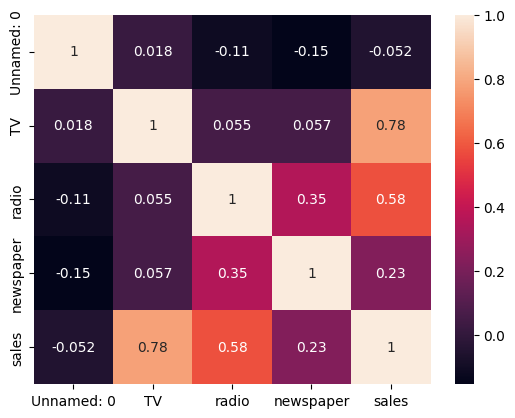

Dựa vào heatmap, ta thấy thuộc tính TV có mối tương quan mạnh với thuộc tính Sales, nên ta sẽ chọn thuộc tính TV để xây dựng mô hình hồi quy


In [29]:
#b, Sử dụng chỉ số tương quan
sns.heatmap(Advertising.corr(), annot=True)
plt.show()
print("Dựa vào heatmap, ta thấy thuộc tính TV có mối tương quan mạnh với thuộc tính Sales, nên ta sẽ chọn thuộc tính TV để xây dựng mô hình hồi quy")

<Axes: xlabel='TV', ylabel='sales'>

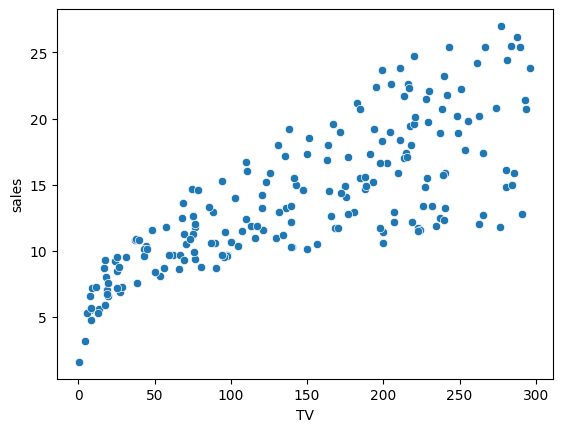

In [32]:
# Sử dụng đồ thị scatter plot
sns.scatterplot(x = 'TV', y = 'sales', data = Advertising)

Mô hình hồi quy: y = 7.0326 + 0.0475*x
R-squared: 0.611875050850071


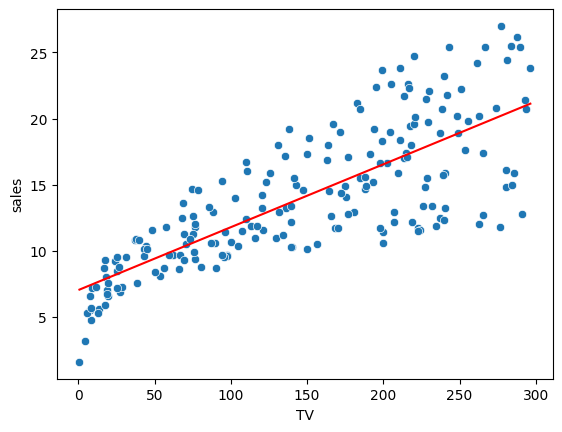

In [33]:
#c
x = Advertising['TV']
y = Advertising['sales']
model = sm.formula.ols('y~x', data=Advertising).fit()
print(f"Mô hình hồi quy: y = {model.params['Intercept'].round(4)} + {model.params['x'].round(4)}*x")

sns.scatterplot(x = 'TV', y = 'sales', data = Advertising)

x = np.linspace(x.min(), x.max(), 100)
y = model.predict({'x': x} )

plt.plot(x, y, color = 'red')

print(f'R-squared: {model.rsquared}')
